In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score

In [3]:
diabetes = pd.read_csv('diabetes_cleaned.csv')
diabetes.drop('HbA1c', axis=1, inplace=True)

In [5]:
X = np.array(diabetes.loc[:, diabetes.columns != 'HbA1c_category']) 
y = np.array(diabetes.loc[:, diabetes.columns == 'HbA1c_category']) 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=37)

In [7]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train.ravel())
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test)) 

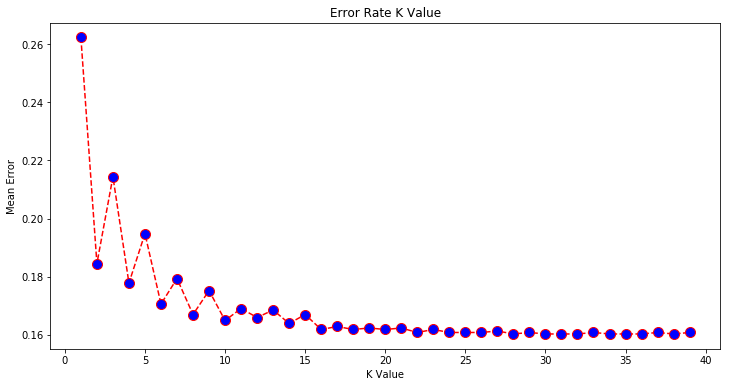

In [8]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')
plt.show()

In [9]:
knn = KNeighborsClassifier(n_neighbors=11)

In [10]:
knn.fit(X_train,y_train)

/home/default/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [11]:
pred = knn.predict(X_test) 

In [14]:
print("Recall:",recall_score(y_test,pred))
print("Precision:",precision_score(y_test,pred))
print("F1-Score:",f1_score(y_test,pred))
print("Accuracy:",accuracy_score(y_test,pred))

Recall: 0.0473933649289
Precision: 0.588235294118
F1-Score: 0.0877192982456
Accuracy: 0.842065299924
